# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
lat_lngs

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url =  "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
print("Beginning Data Retrieval")
print("-----------------------------")
city_counter = 0
city_stat = []
for locations in cities:
    city_counter += 1
    city_url = url + "&q=" + locations 
    print("Processing record set", city_counter, "of", len(cities), "with the city named", locations,)
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_stat.append({"City":locations, "Latitude": city_lat, "Longitude": city_lng, 
                          "Max Temperature": city_max_temp, "Humidity": city_humidity, 
                         "Clouds": city_clouds, "Wind": city_wind, "Country": city_country,
                         "Date": city_date})
    except:
        print("Error, city not found")
        pass


Beginning Data Retrieval
-----------------------------
Processing record set 1 of 608 with the city named san patricio
Processing record set 2 of 608 with the city named katsuura
Processing record set 3 of 608 with the city named hobyo
Processing record set 4 of 608 with the city named linjiang
Processing record set 5 of 608 with the city named rikitea
Processing record set 6 of 608 with the city named hermanus
Processing record set 7 of 608 with the city named rawannawi
Error, city not found
Processing record set 8 of 608 with the city named taolanaro
Error, city not found
Processing record set 9 of 608 with the city named walvis bay
Processing record set 10 of 608 with the city named jatai
Processing record set 11 of 608 with the city named san cristobal
Processing record set 12 of 608 with the city named tevaitoa
Processing record set 13 of 608 with the city named port elizabeth
Processing record set 14 of 608 with the city named mys shmidta
Error, city not found
Processing record s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_stat
city_stat_pd = pd.DataFrame(city_stat)
city_stat_pd


,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind,Country,Date
0,san patricio,28.0170,-97.5169,92.12,60,16,17.65,US,1624662003
1,katsuura,35.1333,140.3000,79.23,77,82,6.96,JP,1624662004
2,hobyo,5.3505,48.5268,77.27,84,97,25.46,SO,1624662004
3,linjiang,41.8069,126.9078,69.89,72,97,2.35,CN,1624662004
4,rikitea,-23.1203,-134.9692,74.26,74,11,3.53,PF,1624662005
...,...,...,...,...,...,...,...,...,...
552,souillac,-20.5167,57.5167,67.35,82,75,11.43,MU,1624662214
553,bonanza,14.0289,-84.5910,77.49,84,95,1.90,NI,1624662214
554,luau,-10.7073,22.2247,61.50,49,8,4.92,AO,1624662214
555,isabela,6.7085,121.9711,79.52,82,94,3.80,PH,1624662215


In [7]:

# weather_df = pd.DataFrame({
#     "City":len(location_name),
#     "Country":len(location_country),
#     "Date":len(date),
#     "Latitude":len(latitude),
#     "Longitude":len(longitude),
#     "Max Temp(f)":len([city_max_temp]),
#     "Humidity":len([city_humidity]),
#     "Wind Speed":len([city_wind]),
#     "Cloudiness":len([city_clouds]),
# weather_df

        
       # city_lat = city_weather["coord"]["lat"]
       # city_lng = city_weather["coord"]["lon"]
       # city_max_temp = city_weather["main"]["temp_max"]
       # city_humidity = city_weather["main"]["humidity"]
        #city_clouds = city_weather["clouds"]["all"]
        #city_wind = city_weather["wind"]["speed"]
        #city_country = city_weather["sys"]["country"]
        #city_date = city_weather["dt"]
city_stat_pd = pd.DataFrame(city_stat)
city_stat_pd.count()

    

City               557
Latitude           557
Longitude          557
Max Temperature    557
Humidity           557
Clouds             557
Wind               557
Country            557
Date               557
dtype: int64

In [8]:
city_stat_pd.to_csv(output_data_file)
city_stat_pd.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Clouds,Wind,Country,Date
0,san patricio,28.0170,-97.5169,92.12,60,16,17.65,US,1624662003
1,katsuura,35.1333,140.3000,79.23,77,82,6.96,JP,1624662004
2,hobyo,5.3505,48.5268,77.27,84,97,25.46,SO,1624662004
3,linjiang,41.8069,126.9078,69.89,72,97,2.35,CN,1624662004
4,rikitea,-23.1203,-134.9692,74.26,74,11,3.53,PF,1624662005


In [9]:
#working on it,
lat_vs_temp = city_stat_pd.groupby(city_stat)[['Latitude','Max Temperature']]
lat_vs_temp.head()

,Latitude,Max Temperature
0,28.0170,92.12
1,35.1333,79.23
2,5.3505,77.27
3,41.8069,69.89
4,-23.1203,74.26


In [11]:
#working on it,
lat_vs_humid = city_stat_pd.groupby(city_stat)[['Latitude','Humidity']]
lat_vs_humid.head()

,Latitude,Humidity
0,28.0170,60
1,35.1333,77
2,5.3505,84
3,41.8069,72
4,-23.1203,74


In [13]:
#working on it,
lat_vs_cloud = city_stat_pd.groupby(city_stat)[['Latitude','Clouds']]
lat_vs_cloud.head()

,Latitude,Clouds
0,28.0170,16
1,35.1333,82
2,5.3505,97
3,41.8069,97
4,-23.1203,11


In [15]:
lat_vs_wind = city_stat_pd.groupby(city_stat)[['Latitude', 'Wind']]
lat_vs_wind.head()

,Latitude,Wind
0,28.0170,17.65
1,35.1333,6.96
2,5.3505,25.46
3,41.8069,2.35
4,-23.1203,3.53


In [17]:
#working on it
count = city_stat_pd.groupby(city_stat).count()
mean = city_stat_pd.groupby(city_stat)[['Latitude']].mean()
median = city_stat_pd.groupby(city_stat)[['Latitude']].median()
standard_dv = city_stat_pd.std()
weather_min = city_stat_pd.groupby(city_stat)[['Latitude']].min()
weather_quartile = city_stat_pd.quantile([0.25,0.5,0.75])
weather_max = city_stat_pd.groupby(city_stat)[['Latitude']].max()
summary_df = pd.DataFrame({"Lat": [city_lat], "Lng": [city_lng], "Max Temp": [city_max_temp],"Humidity": [city_humidity], "Cloudiness": [city_clouds], "Wind Speed": [city_wind], "Date": [city_date]})
summary_df.describe()

    

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,1.0000,1.0000,1.00,1.0,1.0,1.00,1.000000e+00
mean,7.7102,81.6924,79.18,74.0,41.0,7.31,1.624662e+09
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.7102,81.6924,79.18,74.0,41.0,7.31,1.624662e+09
25%,7.7102,81.6924,79.18,74.0,41.0,7.31,1.624662e+09
50%,7.7102,81.6924,79.18,74.0,41.0,7.31,1.624662e+09
75%,7.7102,81.6924,79.18,74.0,41.0,7.31,1.624662e+09
max,7.7102,81.6924,79.18,74.0,41.0,7.31,1.624662e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
max_humid = city_stat_pd.groupby(city_stat)[['Humidity']]
max_humid = max([city_humidity])
max_humid
#max_humid = max('Humidity')

#print('Max Humidity:', max_humid)

74

In [19]:
#  Get the indices of cities that have humidity over 100%.


In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

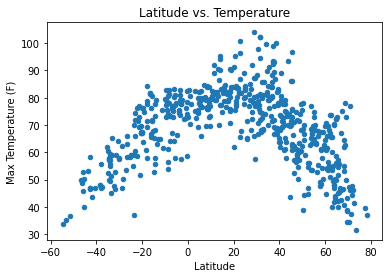

In [44]:
lat_vs_temp = city_stat_pd.plot.scatter(x="Latitude", y="Max Temperature")
plt.title('Latitude vs. Temperature')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

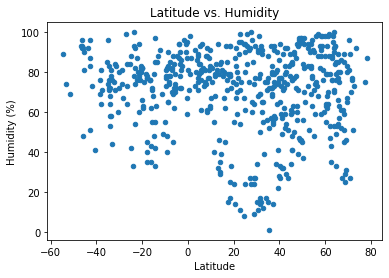

In [45]:
lat_vs_humid = city_stat_pd.plot.scatter(x ='Latitude', y ='Humidity')
plt.title('Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/LatvsHum.png")
plt.show()

## Latitude vs. Cloudiness Plot

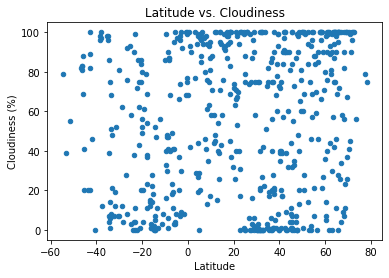

In [46]:
lat_vs_cloud = city_stat_pd.plot.scatter(x='Latitude', y ='Clouds')
plt.title('Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/LatvsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

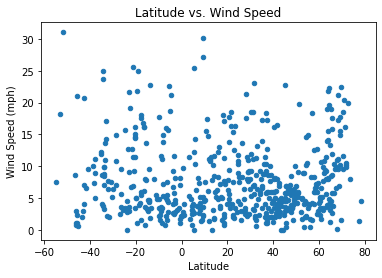

In [47]:
lat_vs_wind = city_stat_pd.plot.scatter(x = 'Latitude', y ='Wind')
plt.title('Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/LatvsWind.png")
plt.show()

## Linear Regression

In [25]:
north_hemisphere_df = city_stat_pd.loc[(city_stat_pd["Latitude"]>= 0)]
south_hemisphere_df = city_stat_pd.loc[(city_stat_pd["Latitude"]< 0)]

In [26]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=18,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46285550152878113


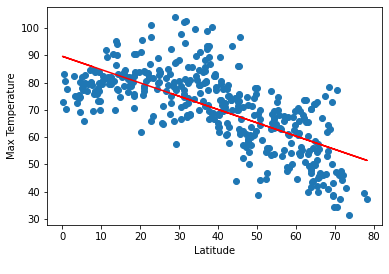

In [53]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Max Temperature"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (6,14))
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6130757663136397


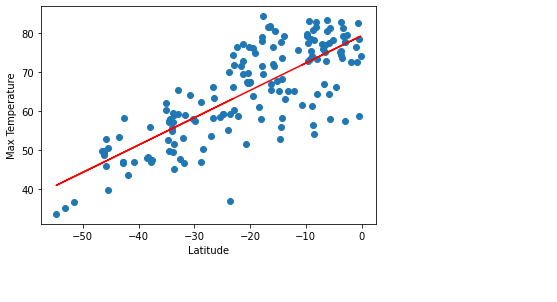

In [28]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Max Temperature"]
plot_linear_regression(x_values, y_values, 'Max Temperature', (6,14))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00044109736051723666


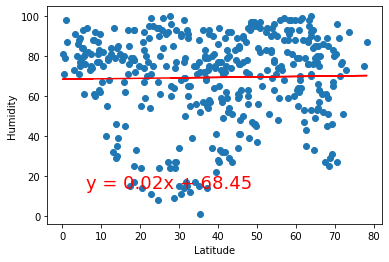

In [29]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,14))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0005004374140599159


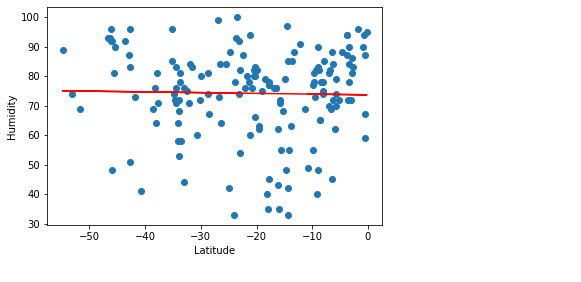

In [30]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,14))
plt.show() 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 4.3054590010854604e-05


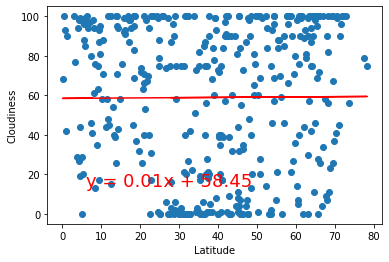

In [31]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Clouds"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,14))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.004964711775762697


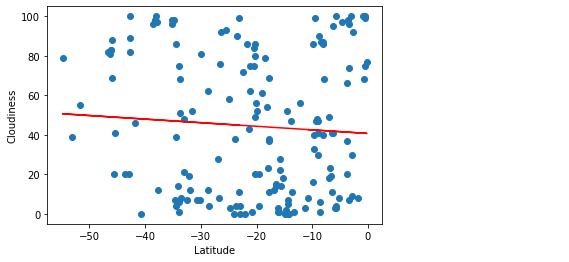

In [32]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Clouds"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,14))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.011048967613440753


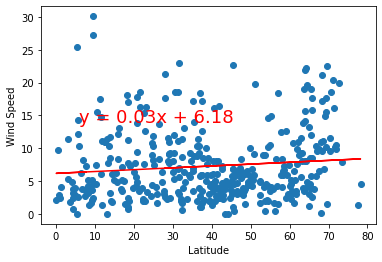

In [33]:
x_values = north_hemisphere_df["Latitude"]
y_values = north_hemisphere_df["Wind"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,14))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.021309451496906245


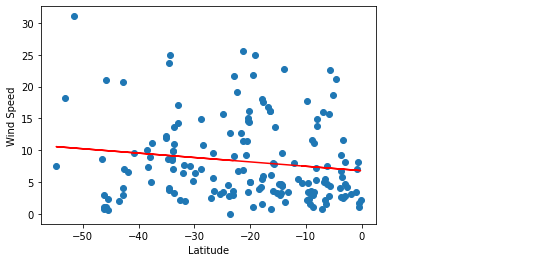

In [34]:
x_values = south_hemisphere_df["Latitude"]
y_values = south_hemisphere_df["Wind"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,14))
plt.show()
